<a href="https://colab.research.google.com/github/pabloubilla/AI-Environment/blob/main/2_Intro_to_ML/1_Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/MScEcologyAndDataScienceUCL/BIOS0032_AI4Environment/blob/main/2_Intro_to_ML/1_Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 Introduction to Machine Learning

## What we will learn

In this weeks colab we will introduce the Machine Learning library `scikit-learn` and practice some basic concepts of Machine Learning (ML), including:

1. How to breakdown ML projects
2. How to do classification with `scikit-learn`
3. How to evaluate model performance
4. How to do regression with `scikit-learn`
5. How to do clustering with `scikit-learn`
6. How to do dimensionality reduction with `scikit-learn`

In the process you will also learn about:
* Some classification algorithms, such as Nearest Neighbors, SVM, Decision Trees and Random Forest
* Some regression algorithms, such as Linear Regression, and Nearest Neighbor Regression

## 1. Intro [20 min]

### Recap

**What is Machine Learning?**

Teaching computers how to perform a task without having to explicitly program them to do it.



> A computer program is said to learn from experience E with respect to some classes of task T and performance measure P if its performance can improve with E on T measured by P.
>
> M. T. Mitchell. 1997. Machine Learning

**Examples**

Butterfly recognition:

* Task T: Classify images of British butterflies into different species
* Performance measure P: percent of images that have been correctly classified
* Training experience E: A database of butterfly images from museum collections

**How does a computer program learn?**

Using **data** to **parametrize** models.

### ML workflow

Using ML for ecological inference is a multistep process. In practice it can generally be broken down into the following steps:

* Data collection
* Data preparation
* Model training
* Model evaluation
* Making predictions

![ml workflow](https://github.com/MScEcologyAndDataScienceUCL/BIOS0032_AI4Environment/blob/main/2_Intro_to_ML/ml_workflow.png?raw=true)

> Simplified workflow from: S. Amershi et al., ["Software Engineering for Machine Learning: A Case Study,"](https://ieeexplore.ieee.org/abstract/document/8804457) 2019 IEEE/ACM 41st International Conference on Software Engineering: Software Engineering in Practice (ICSE-SEIP), Montreal, QC, Canada, 2019, pp. 291-300, doi: 10.1109/ICSE-SEIP.2019.00042.

The previous figure serves as a guideline indicating the usual flow, but it is not uncommon to work simultaneously on multiple steps.

Working in cycles is recommended. Model evaluation will inform if you need more data, clean the data further or change the model.

Each step can be subdivided further:

**Data Collection**

* Design your ML goals
* Determine what data (and ideally how much) you will need.
* Collect data from multiple sources
    * Field studies
    * Open-source datasets
    * Web scraping
    * Citizen science
    * Colaboration

**Data Preparation**

* Select feature set
* Clean dataset, fix errors, decide what to do with missing values
* Normalize variables
* Annotate or label data
* Split data into training and test datasets

**Model Training**

* Select an adequate ML model
* Train model and validate
* Finetune hyperparameters

**Model Evaluation**

* Compute metrics
* Visualize predictions
* Study failure cases
* Identify weak spots
* Compare with baselines

**Make predictions**

* Use model to process novel data
* Use predictions to make ecological inference

Now you will step through some practical examples of some of the steps listed above.

### Scikit-Learn

`scikit-learn` is a Python library for Machine Learning.

It offers a wide array of algorithms for several ML tasks, and tools to setup ML pipelines.

![scikit-learn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/260px-Scikit_learn_logo_small.svg.png?20180808062052)

You can learn about `scikit-learn` in its official [documentation](https://scikit-learn.org/stable/index.html).

In [118]:
import sklearn  # notice scikit-learn is imported as sklearn.

# scikit-learn will be preinstalled in colab environments

# print the currently installed scikit-learn version
print(sklearn.__version__)

1.2.2


## 2. Classification [40 min]

Suppose you need to automate the following task

**Task**: Identify Iris flower species

How would you describe this Iris flower?

![iris](https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg/470px-Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg?20140528110728)

* Colour?
* Number of stripes?
* Size?
* Weight?
* Environment?

**What are features?**

They are numerical or categorical descriptors, attributes or traits of the object of study.

> A **feature** is an individual measurable property or characteristic of a phenomenon
>
> *Bishop, Christopher (2006). Pattern recognition and machine learning*

In the case of Iris flowers, lets use sepal and petal length and width

![iris sepal/petal length/width](https://ars.els-cdn.com/content/image/3-s2.0-B9780128147610000034-f03-01-9780128147610.jpg)

Feature vector - Feature (descriptor):

    x = (sepal_length, sepal_width, petal_length, petal_width)

**Where to get Iris flower data?**

A dataset of iris measurements is publicly available. Find a description [here](https://archive.ics.uci.edu/ml/datasets/iris).

Lets load a dataset of Iris flower measurements using `scikit-learn`.

In [119]:
# scikit-learn offers toy datasets including the iris dataset.
# load the dataset functions from scikit-learn.
from sklearn import datasets

In [120]:
# load the iris dataset
iris = datasets.load_iris(as_frame=True)

# extract the features table
iris_data = iris.data

In [121]:
# print the first rows
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**What is a classification task?**

**Recall**: Supervised learning is one of the main approaches of Machine Learning. It consists of trying to predict a **target** variable using **features** as predictors.

It is a supervised learning task where the target variable is a categorical variable, that is when trying to predict a class based on features.

For the Iris dataset, given our feature vector **x**, can we predict the correct species (i.e. class label) **y**?

In [122]:
# extract the classification targets
iris_target = iris.target

In [123]:
# print first values of iris_target
iris_target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [124]:
# count the number of rows per target class
iris_target.value_counts()

# notice the target class is codified as a integer value

0    50
1    50
2    50
Name: target, dtype: int64

In [125]:
# get the class names
species_names = iris.target_names

# print the correspondence between integer values and species names
for index, name in enumerate(species_names):
    print(f"class {index} = {name}")

# map the target integer values to species names
y_iris = iris_target.apply(lambda index: species_names[index])

y_iris.head()

class 0 = setosa
class 1 = versicolor
class 2 = virginica


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target, dtype: object

### Nearest Neighbor Classification

Select two features: petal length and petal width

In [126]:
feature_1 = "petal length (cm)"
feature_2 = "petal width (cm)"
X_iris = iris_data[[feature_1, feature_2]]

Each datapoint has some <span style="color: deepskyblue;">features</span> and a <span style="color: coral;">class label</span>

In [127]:
# import seaborn and matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns

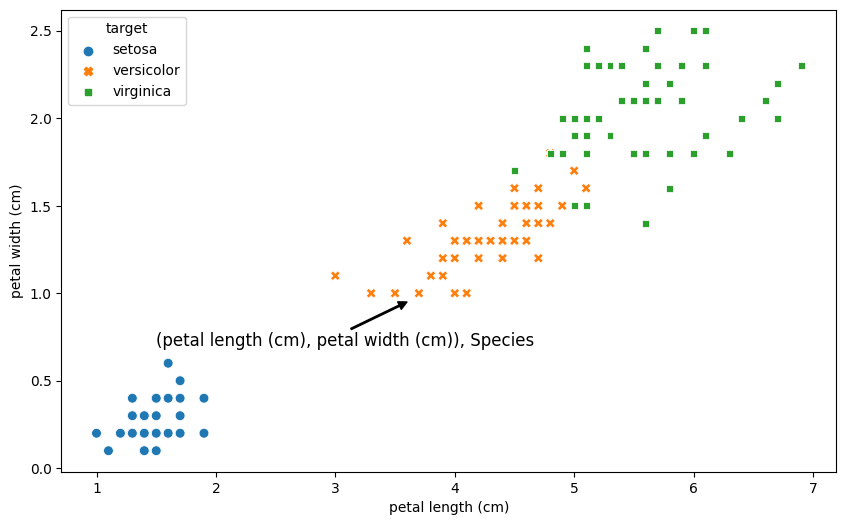

In [128]:
# visualize the dataset
plt.figure(figsize=(10, 6))

# plot each data point (x = feature1, y = feature2) and the species in color
ax = sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
    style=y_iris,
    s=50,
)

# select a single data point
sample = iris_data.iloc[60]

# add text to point to single data point
ax.annotate(
    f"({feature_1}, {feature_2}), Species",
    (sample[feature_1] + 0.1, sample[feature_2] - 0.05),
    xytext=(sample[feature_2] + 0.5, sample[feature_2] - 0.3),
    fontsize=12,
    arrowprops={
        "width": 1,
        "headwidth": 6,
        "headlength": 6,
        "edgecolor": "black",
        "facecolor": "black",
    },
);

Given a <span style="color: deepskyblue;">new</span> datapoint, how can we determine its <span style="color: coral">class</span>?

In [129]:
# create new test point
test_point = [3.8, 1.6]  # petal length cm, petal width cm

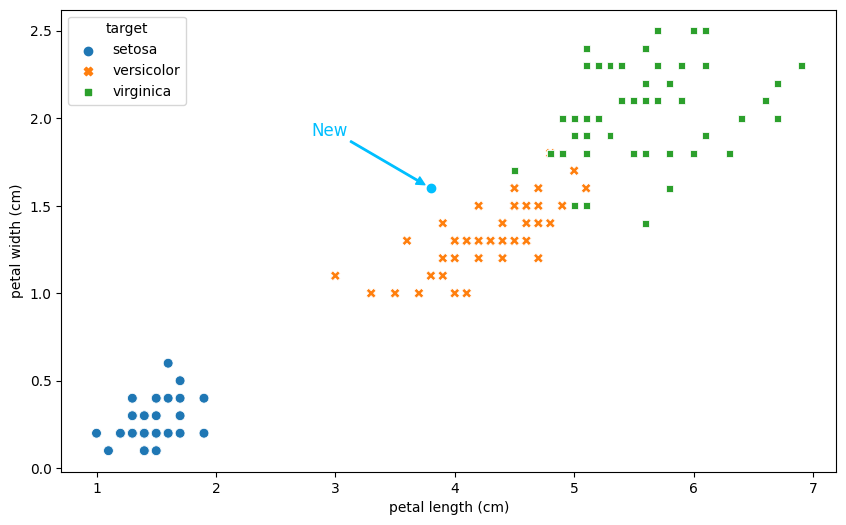

In [130]:
plt.figure(figsize=(10, 6))

# plot the species type in color
ax = sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
    style=y_iris,
    s=50,
)

# plot the new test point
ax.scatter(x=[test_point[0]], y=[test_point[1]], color="deepskyblue")

# add "new" text and arrow pointing at new test point
ax.annotate(
    "New",
    (test_point[0] - 0.05, test_point[1] + 0.02),
    xytext=(test_point[0] - 1, test_point[1] + 0.3),
    fontsize=12,
    color="deepskyblue",
    arrowprops={
        "width": 1,
        "headwidth": 6,
        "headlength": 6,
        "edgecolor": "deepskyblue",
        "facecolor": "deepskyblue",
    },
);

**Simple idea**: Assign the class of the nearest point in the dataset.

How to find the nearest point in our dataset to a given test point?

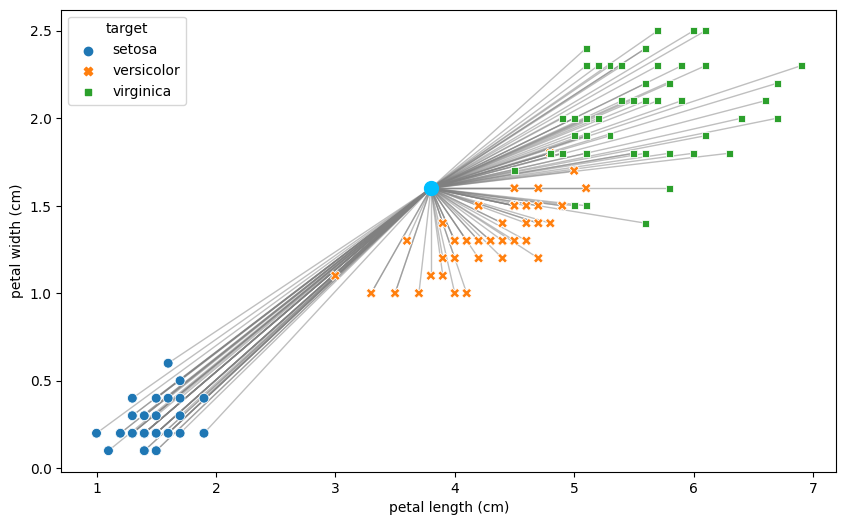

In [131]:
plt.figure(figsize=(10, 6))

# plot the species type in color
ax = sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
    style=y_iris,
    s=50,
    zorder=2,
)

# plot a line from the test point to each point in the dataset
for _, flower in iris_data.iterrows():
    ax.plot(
        [test_point[0], flower[feature_1]],
        [test_point[1], flower[feature_2]],
        color="gray",
        linewidth=1,
        alpha=0.5,
        zorder=1,
    )

# plot the test point
ax.scatter(
    x=[test_point[0]],
    y=[test_point[1]],
    color="deepskyblue",
    s=100,
    zorder=2,
);

Compute **similarity** between two feature points.

Use *Euclidean* distance (based on the pythagorean theorem)

![euclidean distance](https://upload.wikimedia.org/wikipedia/commons/5/55/Euclidean_distance_2d.svg)

In [132]:
# import numpy for math functions
import numpy as np


# implementation of distance between two points
def compute_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

And find the minimum

In [133]:
# compute the distance from the test point to every example in the dataset
distance_to_test_point = iris_data.apply(
    lambda row: compute_distance(test_point, [row[feature_1], row[feature_2]]),
    axis=1,
)

# print the first results
distance_to_test_point.head()

0    2.778489
1    2.778489
2    2.865310
3    2.692582
4    2.778489
dtype: float64

In [134]:
# find the point in the dataset that is closest to the test point
# and record its distance

# get index where distance is minimized
index_of_min_distance = distance_to_test_point.argmin()

# retrieve the corresponding data point
closest_point = iris_data.iloc[index_of_min_distance]

# compute minimum distance
distance_to_closest = distance_to_test_point.min()

print("Distance to closest point: ", distance_to_closest)

Distance to closest point:  0.22360679774997916


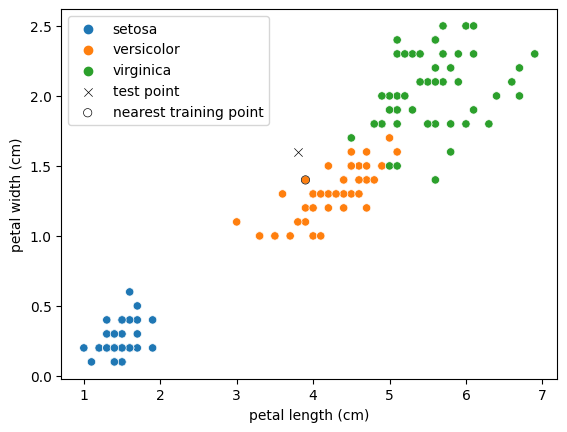

In [135]:
# plot the dataset
sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
)

# plot the test point as an 'x'
sns.scatterplot(
    x=[test_point[0]],
    y=[test_point[1]],
    marker="x",
    label="test point",
    color="black",
)

# plot a ring around the nearest datapoint
sns.scatterplot(
    x=[closest_point[feature_1]],
    y=[closest_point[feature_2]],
    marker="o",
    label="nearest training point",
    edgecolor="black",
    facecolor="none",
);

In [136]:
# assume the test point is the same class as the datapoint it is closest to
predicted_species = y_iris[index_of_min_distance]
print(f"Predicted species: {predicted_species}")

Predicted species: versicolor


**Summary: The nearest neighbor algorithm**

1. Given a test point x
2. Compute the distance between x and every other datapoint
3. The class of x is set as the same as the closest datapoint

Here is a quick implementation of the nearest neighbor algorithm

In [137]:
def nearest_neighbour(test_point):
    # compute the distance from the test point to every example in the dataset
    distance = iris_data.apply(
        lambda row: compute_distance(test_point, [row[feature_1], row[feature_2]]),
        axis=1,
    )

    # get index where distance is minimum
    index_of_min_distance = distance.argmin()

    # find the point in the dataset that is closest to the test point
    closest_point = iris_data.iloc[index_of_min_distance]

    # assume the test point is the same class as the datapoint it is closest to
    predicted_species = y_iris[index_of_min_distance]

    return predicted_species, closest_point

Scikit-learn also provides an easy way of building Nearest Neighbor Classification Models.

In [138]:
# import the KNeighborsClassifier from scikit learn
from sklearn.neighbors import KNeighborsClassifier

# create a model instance
knn_model_1 = KNeighborsClassifier(n_neighbors=1)

# fit model with the iris dataset
knn_model_1.fit(X_iris, y_iris)

KNeighborsClassifier(n_neighbors=1)

The model can be used to make inference on new points. Lets try it out on a new test point, make sure we get the same results as before, and plot the predictions.

In [139]:
# use it to predict the species of a test point
test_point_2 = np.array([2.1, 0.7])

predicted_species_2 = knn_model_1.predict(test_point_2.reshape(1, -1))[0]

print(predicted_species)

versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [140]:
# make sure it coincides with our algorithm
predicted_species_2_ours, closest_point_2 = nearest_neighbour(test_point_2)
print(f"Predictions are equal = {predicted_species_2 == predicted_species_2_ours}")

Predictions are equal = True


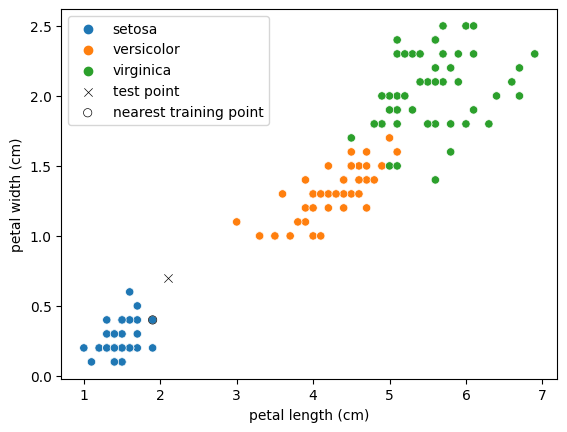

In [141]:
# plot training dataset
ax = sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
)

# plot the test point as an 'x'
sns.scatterplot(
    x=[test_point_2[0]],
    y=[test_point_2[1]],
    marker="x",
    label="test point",
    color="black",
)

# plot a ring around the nearest datapoint
sns.scatterplot(
    x=[closest_point_2[feature_1]],
    y=[closest_point_2[feature_2]],
    marker="o",
    label="nearest training point",
    edgecolor="black",
    facecolor="none",
);

The model predicts some species to every point in feature space.

**Decision regions** are formed by points that are assigned to the same species.

The regions are separated by **decision boundaries** where the model is unsure what class to assign.

The next cell contains some function definitions to plot decision regions and boundaries. You can safely ignore it, but make sure to run the code block.

In [142]:
# @title plot decision boundary function definition

# IGNORE: here we define functions to plot the decision boundary.
# Their implementation is not relevant.

from functools import reduce

from sklearn.base import is_regressor
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import _safe_indexing
from sklearn.utils.validation import _is_arraylike, _num_features


def _is_arraylike_not_scalar(array):
    return _is_arraylike(array) and not np.isscalar(array)


def _check_boundary_response_method(estimator, response_method):
    has_classes = hasattr(estimator, "classes_")
    if has_classes and _is_arraylike_not_scalar(estimator.classes_[0]):
        msg = "Multi-label and multi-output multi-class classifiers are not supported"
        raise ValueError(msg)

    if has_classes and len(estimator.classes_) > 2:
        if response_method not in {"auto", "predict"}:
            msg = (
                "Multiclass classifiers are only supported when response_method is"
                " 'predict' or 'auto'"
            )
            raise ValueError(msg)
        methods_list = ["predict"]
    elif response_method == "auto":
        methods_list = ["decision_function", "predict_proba", "predict"]
    else:
        methods_list = [response_method]

    prediction_method = [getattr(estimator, method, None) for method in methods_list]
    prediction_method = reduce(lambda x, y: x or y, prediction_method)
    if prediction_method is None:
        raise ValueError(
            f"{estimator.__class__.__name__} has none of the following attributes: "
            f"{', '.join(methods_list)}."
        )

    return prediction_method


def plot_decision_boundary(
    estimator,
    X,
    *,
    grid_resolution=100,
    eps=1.0,
    plot_method="contourf",
    response_method="auto",
    xlabel=None,
    ylabel=None,
    ax=None,
    **kwargs,
):
    if not grid_resolution > 1:
        raise ValueError(
            "grid_resolution must be greater than 1. Got" f" {grid_resolution} instead."
        )

    if not eps >= 0:
        raise ValueError(f"eps must be greater than or equal to 0. Got {eps} instead.")

    possible_plot_methods = ("contourf", "contour", "pcolormesh")
    if plot_method not in possible_plot_methods:
        available_methods = ", ".join(possible_plot_methods)
        raise ValueError(
            f"plot_method must be one of {available_methods}. "
            f"Got {plot_method} instead."
        )

    num_features = _num_features(X)
    if num_features != 2:
        raise ValueError(f"n_features must be equal to 2. Got {num_features} instead.")

    x0, x1 = _safe_indexing(X, 0, axis=1), _safe_indexing(X, 1, axis=1)

    x0_min, x0_max = x0.min() - eps, x0.max() + eps
    x1_min, x1_max = x1.min() - eps, x1.max() + eps

    xx0, xx1 = np.meshgrid(
        np.linspace(x0_min, x0_max, grid_resolution),
        np.linspace(x1_min, x1_max, grid_resolution),
    )

    if hasattr(X, "iloc"):
        # we need to preserve the feature names and therefore get an empty dataframe
        X_grid = X.iloc[[], :].copy()
        X_grid.iloc[:, 0] = xx0.ravel()
        X_grid.iloc[:, 1] = xx1.ravel()
    else:
        X_grid = np.c_[xx0.ravel(), xx1.ravel()]

    pred_func = _check_boundary_response_method(estimator, response_method)
    response = pred_func(X_grid)

    # convert classes predictions into integers
    if pred_func.__name__ == "predict" and hasattr(estimator, "classes_"):
        encoder = LabelEncoder()
        encoder.classes_ = estimator.classes_
        response = encoder.transform(response)

    if response.ndim != 1:
        if is_regressor(estimator):
            raise ValueError("Multi-output regressors are not supported")

        # TODO: Support pos_label
        response = response[:, 1]

    if xlabel is None:
        xlabel = X.columns[0] if hasattr(X, "columns") else ""

    if ylabel is None:
        ylabel = X.columns[1] if hasattr(X, "columns") else ""

    if plot_method not in ("contourf", "contour", "pcolormesh"):
        raise ValueError("plot_method must be 'contourf', 'contour', or 'pcolormesh'")

    if ax is None:
        _, ax = plt.subplots()

    plot_func = getattr(ax, plot_method)

    surface_ = plot_func(xx0, xx1, response.reshape(xx0.shape), **kwargs)

    if xlabel is not None or not ax.get_xlabel():
        xlabel = xlabel if xlabel is None else xlabel
        ax.set_xlabel(xlabel)

    if ylabel is not None or not ax.get_ylabel():
        ylabel = ylabel if ylabel is None else ylabel
        ax.set_ylabel(ylabel)

    return ax

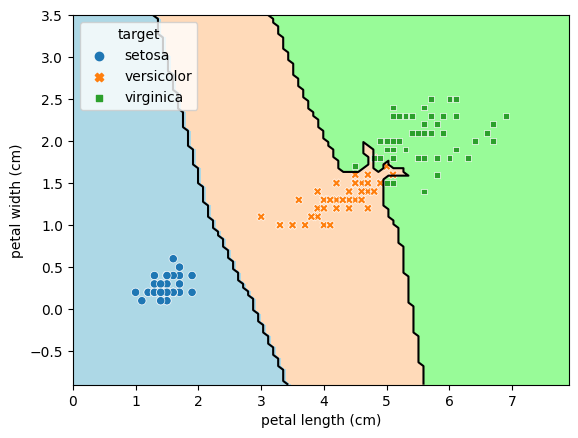

In [143]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(["lightblue", "peachpuff", "palegreen"])

# plot the decision regions
ax = plot_decision_boundary(knn_model_1, X_iris, cmap=cmap_light)

# plot the decision boundary
ax = plot_decision_boundary(
    knn_model_1,
    X_iris,
    plot_method="contour",
    ax=ax,
    levels=[0, 1],
    colors="black",
)

# overlay data points from iris dataset
ax = sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
    style=y_iris,
)

Now you will see some problems with the nearest neighbor algorithm. These are:

1. Overconfidence
2. Memory and Speed
3. Sensitive to Noise
4. Sensitive to changes in Scale

**Overconfidence**

When making inference on a point far from the training points, the model can be very confident about its prediction.

Example: the following test point is much closer to any *virginica* point than any other species.

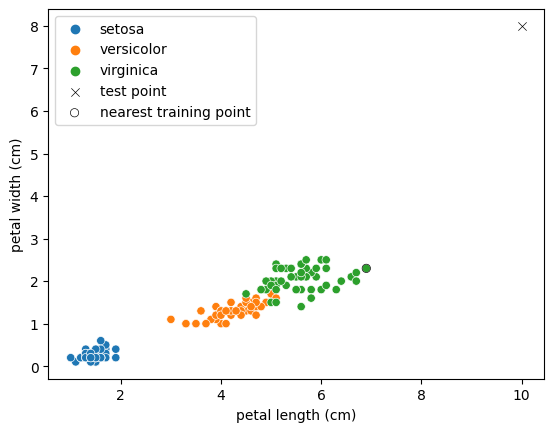

In [144]:
# new test point far from all other data points
test_point_3 = [10, 8]

_, closest_point_3 = nearest_neighbour(test_point_3)

# plot training dataset
sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
)

# plot the test point as an 'x'
sns.scatterplot(
    x=[test_point_3[0]],
    y=[test_point_3[1]],
    marker="x",
    label="test point",
    color="black",
)

# plot a ring around the nearest datapoint
sns.scatterplot(
    x=[closest_point_3[feature_1]],
    y=[closest_point_3[feature_2]],
    marker="o",
    label="nearest training point",
    edgecolor="black",
    facecolor="none",
);

Is this a reasonable behaviour?

**Memory and speed**

The Nearest Neighbor model needs to store all points in the training dataset.

Additionally, at inference it computes every distance from the test point to the training set points.

For large datasets it becomes cumbersome.

In [145]:
# import a performance timer from the standard library
from time import perf_counter

test_point_4 = np.array([4, 4])


def measure_nearest_neighbor_speed(n_samples, test_point=test_point_4):
    # generate toy dataset with scikit-learn dataset functions.
    X, y = datasets.make_classification(
        n_samples=n_samples,
        n_features=2,  # Two features
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=2,  # Two classes
    )

    # create a Nearest Neighbor model
    model = KNeighborsClassifier(n_neighbors=1, algorithm="brute", n_jobs=1)

    # measure fit time
    start_fit = perf_counter()
    model.fit(X, y)
    fit_time = perf_counter() - start_fit

    # measure prediction time
    start_predict = perf_counter()
    model.predict(test_point.reshape(1, -1))
    predict_time = perf_counter() - start_predict

    return fit_time, predict_time

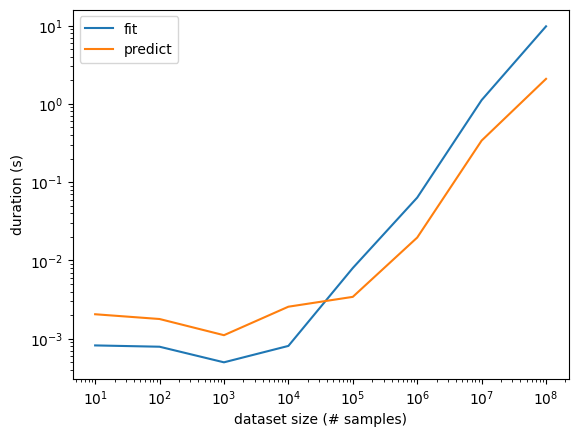

In [146]:
# select different sizes of dataset.
# logspace will return exponentially separated points.
# 10, 100, 1000, ..., 10E8
dataset_sizes = np.logspace(start=1, stop=8, num=8, dtype=np.int32)

# measure time to fit and predict for each dataset size
fit_times, predict_times = zip(
    *[measure_nearest_neighbor_speed(n_samples) for n_samples in dataset_sizes]
)

# plot times
plt.plot(dataset_sizes, fit_times, label="fit")
plt.plot(dataset_sizes, predict_times, label="predict")

# make axis logarithmic
plt.xscale("log")
plt.yscale("log")

# add axis labels
plt.ylabel("duration (s)")
plt.xlabel("dataset size (# samples)")
plt.legend();

**Noise sensitivity**

If a single mistake is introduced in the dataset the **decision boundaries** can change drastically.

In [147]:
# the species of the 134th element is virginica
index = 134
print(y_iris[index])

# make a copy of the targets
y_iris_corrupted = y_iris.copy()

# and change the label of a single entry
y_iris_corrupted[index] = "versicolor"

virginica


In [148]:
# fit new NN model with corrupted labels
knn_model_with_corrupted_data = KNeighborsClassifier(n_neighbors=1).fit(
    X_iris, y_iris_corrupted
)

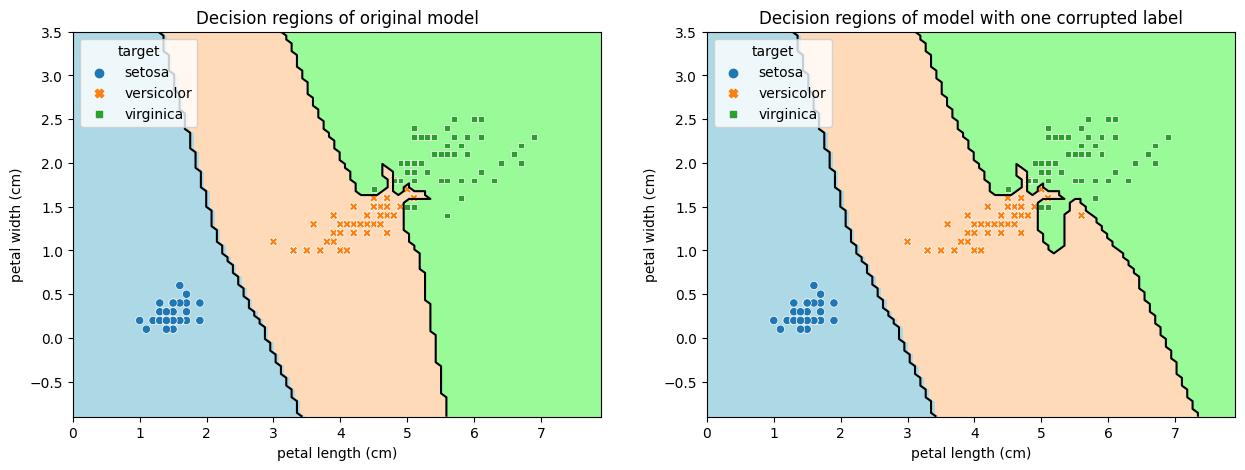

In [149]:
plt.figure(figsize=(15, 5))

# create a subplot on the left
ax1 = plt.subplot(1, 2, 1)
ax1.set_title("Decision regions of original model")

# plot the decision regions and boundary of original model
plot_decision_boundary(knn_model_1, X_iris, cmap=cmap_light, ax=ax1)
plot_decision_boundary(
    knn_model_1,
    X_iris,
    plot_method="contour",
    ax=ax1,
    levels=[0, 1],
    colors="black",
)

# overlay data points from iris dataset
sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris,
    style=y_iris,
    ax=ax1,
)

# create a subplot on the right
ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Decision regions of model with one corrupted label")

# plot the decision regions and boundary of model with corrupted data
plot_decision_boundary(
    knn_model_with_corrupted_data,
    X_iris,
    cmap=cmap_light,
    ax=ax2,
)

plot_decision_boundary(
    knn_model_with_corrupted_data,
    X_iris,
    plot_method="contour",
    ax=ax2,
    levels=[0, 1],
    colors="black",
)

# overlay data points from iris dataset
sns.scatterplot(
    data=iris_data,
    x=feature_1,
    y=feature_2,
    hue=y_iris_corrupted,
    style=y_iris_corrupted,
    ax=ax2,
);

**Sensitivity to scale**

So far we have been using **cm** as units for length.

What happens if we change cm to meters for a single feature?

How does this choice affect predictions?

In [150]:
# modify the feature array so that the first feature is in meters
X_iris_2 = X_iris.copy()
X_iris_2["petal length (m)"] = X_iris["petal length (cm)"] / 100
X_iris_2 = X_iris_2.reindex(columns=["petal length (m)", "petal width (cm)"])

In [151]:
# fit model with new feature array
knn_model_2 = KNeighborsClassifier(n_neighbors=1).fit(X_iris_2, y_iris)

In [152]:
# we wish to classify a new flower. These are the measurements of the flower with
# two different units of measurements
test_point_5_cm = np.array([2.7, 0.7])  # (petal length cm, petal width cm)
test_point_5_m = np.array([0.027, 0.7])  # (petal length m, petal width cm)

In [153]:
# predict with cm
predicted_species_cm = knn_model_1.predict(test_point_5_cm.reshape(1, -1))[0]

# predict with meters
predicted_species_m = knn_model_2.predict(test_point_5_m.reshape(1, -1))[0]

print(
    f"Species predictions: with cm as units = {predicted_species_cm}, with m as units = {predicted_species_m}"
)

Species predictions: with cm as units = versicolor, with m as units = setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Summary**

The nearest neighbor algorithm is intuitive and simple to implement. But

* is very sensitive to errors and scaling (recall underfitting/overfitting discussion?)
* requires lots of memory and computation

What are some alternatives?

Is there a way that involves less computation?

### Support Vector Machines

Lets simplify our dataset

In [154]:
# select only data of the setosa and virginica species
separable_data = iris_data[y_iris.isin(["setosa", "versicolor"])]

# Select features and labels for the filtered dataset
X_separable = separable_data[[feature_1, feature_2]]
y_separable = y_iris[y_iris.isin(["setosa", "versicolor"])]

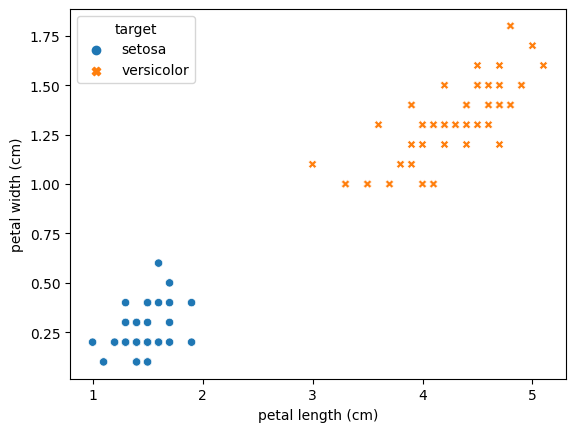

In [155]:
# plot data points
sns.scatterplot(
    data=separable_data,
    x=feature_1,
    y=feature_2,
    hue=y_separable,
    style=y_separable,
);

Data points from the different species are clearly separated.

They can be separated by a line and new points can be classified depending on which side of the line they fall.

In essence this is how a linear classifier operates.

Here we will use the linear support vector classifier (SVC).

See [here](https://scikit-learn.org/stable/modules/svm.html#svc) for more details.

In [156]:
# import the Linear SVC model from the SVM module in scikit-learn
from sklearn.svm import LinearSVC

In [157]:
# fit a linear support vector classifier (SVC) on the separable dataset
linear_svc_separable = LinearSVC().fit(
    X_separable,
    y_separable,
)

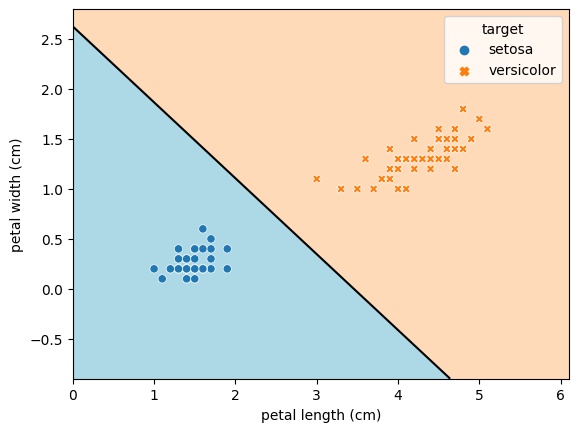

In [158]:
# plot the decision regions of the linear classifier
ax = plot_decision_boundary(
    linear_svc_separable,
    X_separable,
    cmap=ListedColormap(["lightblue", "peachpuff"]),
)

# plot the decision boundary of the linear classifier
plot_decision_boundary(
    linear_svc_separable,
    X_separable,
    plot_method="contour",
    levels=[0],
    colors="black",
    ax=ax,
)

# overlay the dataset points
sns.scatterplot(
    data=separable_data,
    x=feature_1,
    y=feature_2,
    hue=y_separable,
    style=y_separable,
    ax=ax,
);

The linear model is small in memory and very fast.

But in most cases it will not generate perfect predictions.

In [159]:
# select only data of the versicolor and virginica species
non_separable_data = iris_data[y_iris.isin(["virginica", "versicolor"])]

X_non_separable = non_separable_data[[feature_1, feature_2]]
y_non_separable = y_iris[y_iris.isin(["virginica", "versicolor"])]

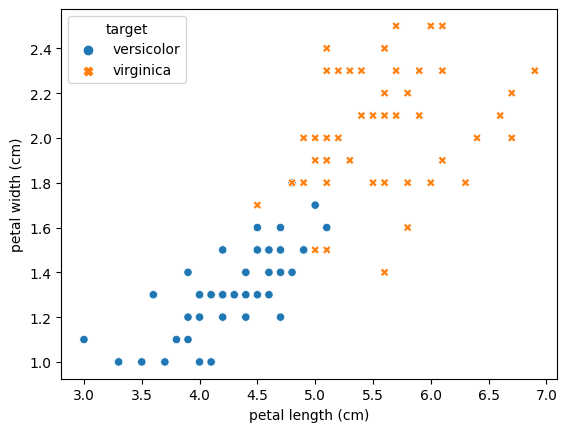

In [160]:
# plot data points
sns.scatterplot(
    data=non_separable_data,
    x=feature_1,
    y=feature_2,
    hue=y_non_separable,
    style=y_non_separable,
);

No line cuts the two sets of points cleanly.

When we fit a linear model prediction errors are unavoidable.

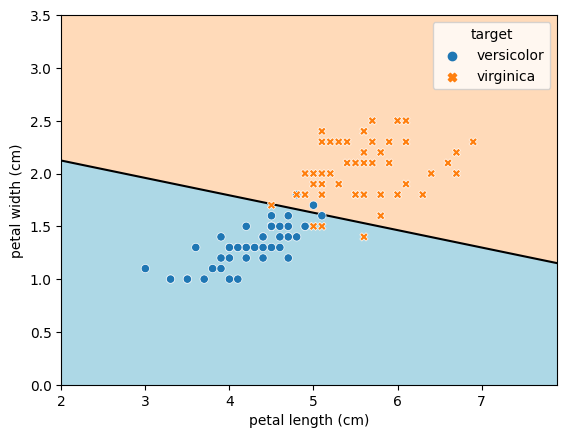

In [161]:
# fit a linear support vector classifier (SVC) on the separable dataset
linear_svc_non_separable = LinearSVC().fit(
    X_non_separable,
    y_non_separable,
)

# plot the decision regions of the linear classifier
ax = plot_decision_boundary(
    linear_svc_non_separable,
    X_non_separable,
    cmap=ListedColormap(["lightblue", "peachpuff"]),
)

# plot the decision boundary of the linear classifier
plot_decision_boundary(
    linear_svc_non_separable,
    X_non_separable,
    plot_method="contour",
    levels=[0],
    ax=ax,
    colors="black",
    zorder=1,
)

# overlay the dataset points
sns.scatterplot(
    data=non_separable_data,
    x=feature_1,
    y=feature_2,
    hue=y_non_separable,
    style=y_non_separable,
    ax=ax,
    zorder=2,
);

Support vector machines can be non-linear by applying the so called kernel-trick.

If interested in details check the [An Introduction to Statistical Learning](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf) book.

In [162]:
# import the support vector classifier model from scikit-learn
from sklearn.svm import SVC

In [163]:
# fit a non-linear support vector machine on the non-linearly-separable dataset
non_linear_svc = SVC(C=100, gamma=10).fit(
    X_non_separable,
    y_non_separable,
)

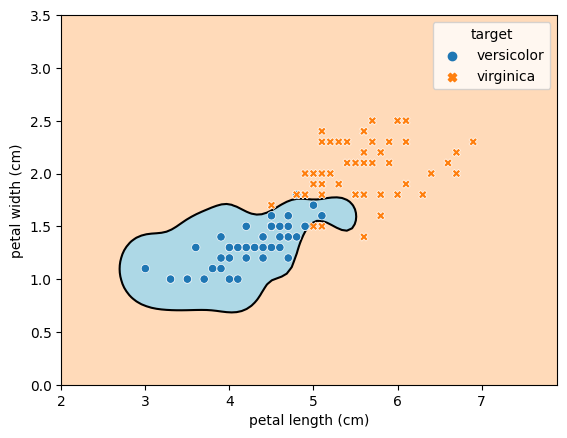

In [164]:
# plot the decision regions of the non-linear svm classifier
ax = plot_decision_boundary(
    non_linear_svc,
    X_non_separable,
    cmap=ListedColormap(["lightblue", "peachpuff"]),
)

# plot the decision boundary of the non-linear svm classifier
plot_decision_boundary(
    non_linear_svc,
    X_non_separable,
    plot_method="contour",
    levels=[0],
    ax=ax,
    colors="black",
    zorder=1,
)

# overlay the dataset points
sns.scatterplot(
    data=non_separable_data,
    x=feature_1,
    y=feature_2,
    hue=y_non_separable,
    style=y_non_separable,
    ax=ax,
    zorder=2,
);

### Decision Trees

**Another simple idea**: Use simple binary decisions to discriminate between points. Use a sequence or tree of decisions to bin a test point into its correct species.

Example binary decision: whether the petal length ≤ 5.1 cm, or the petal width is ≤ 1.75 cm.

Can be nested: If petal length > 5.2 cm, and petal width < 1.3 then predict setosa.

Each decision splits feature space in two.

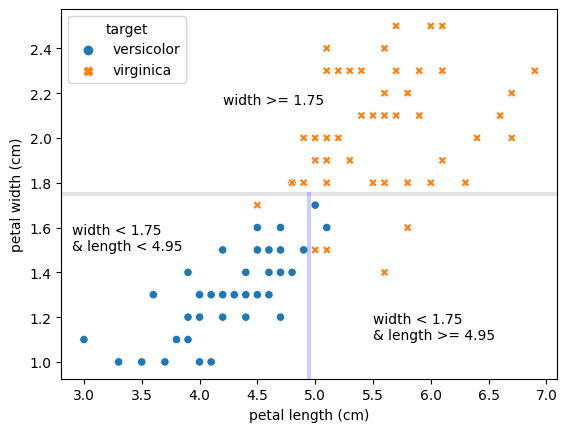

In [165]:
# plot the dataset points
ax = sns.scatterplot(
    data=non_separable_data,
    x=feature_1,
    y=feature_2,
    hue=y_non_separable,
    style=y_non_separable,
)

# draw horizontal line at y = 1.75
ax.axhline(1.75, color="gray", linewidth=3, alpha=0.2)

# draw vertical line at x = 4.95
ax.axvline(4.95, color="blue", linewidth=3, alpha=0.2, ymax=0.5)

# add text to label regions
ax.text(4.2, 2.15, f"width >= 1.75")
ax.text(2.9, 1.5, f"width < 1.75\n& length < 4.95")
ax.text(5.5, 1.1, f"width < 1.75\n& length >= 4.95");

Decision trees for classification can be created algorithmically.

Multiple algorithms are available, here we will use the default algorithm from `scikit-learn` (ID3).

In [166]:
# import the Decision Tree Classifier model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [167]:
# create a Decision Tree classifier model
decision_tree = DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.01)
# check the scikit-learn documentation to see possible configurations

In [168]:
# fit to dataset
decision_tree.fit(
    X_non_separable,
    y_non_separable,
);

Decision trees are easily interpretable as it is possible to understand the reason behind a model prediction.

You can visualise the whole decision tree.

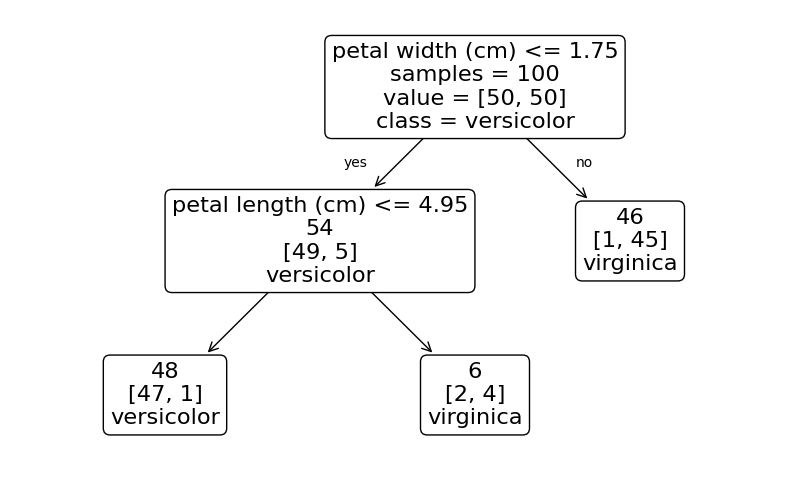

In [169]:
# import plot_tree function from tree tools in scikit-learn
from sklearn.tree import plot_tree

# create a new figure
_, ax = plt.subplots(figsize=(10, 6))

# visualize the trained decision trees
plot_tree(
    decision_tree,
    feature_names=[feature_1, feature_2],
    class_names=decision_tree.classes_,
    impurity=False,
    label="root",
    rounded=True,
    ax=ax,
)

# Add labels to decisions
ax.text(0.43, 0.66, "yes")
ax.text(0.73, 0.66, "no");

Here is the region boundary plot for the fitted decision tree

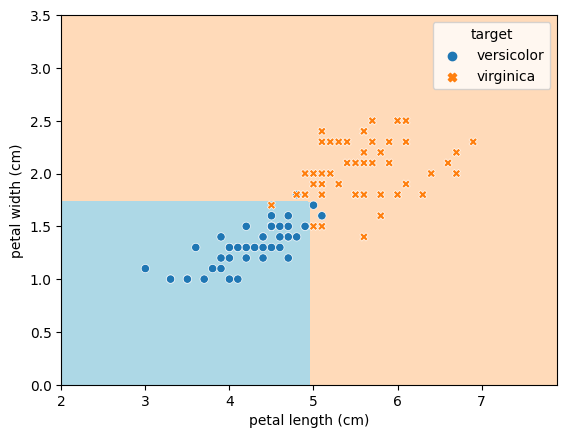

In [170]:
# plot the decision boundary of the decision tree classifier
ax = plot_decision_boundary(
    decision_tree,
    X_non_separable,
    cmap=ListedColormap(["lightblue", "peachpuff"]),
)

# plot the decision boundary of the decision tree classifier
plot_decision_boundary(
    decision_tree,
    X_non_separable,
    plot_method="contour",
    levels=[0],
    ax=ax,
    colors="black",
    zorder=1,
)

# overlay the dataset points
sns.scatterplot(
    data=non_separable_data,
    x=feature_1,
    y=feature_2,
    hue=y_non_separable,
    style=y_non_separable,
    ax=ax,
    zorder=2,
);

Decision trees are customizable in several ways.

In [171]:
# create another tree with max_depth = 4
decision_tree_2 = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01)

In [172]:
# fit to dataset
decision_tree_2.fit(
    X_non_separable,
    y_non_separable,
)

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01)

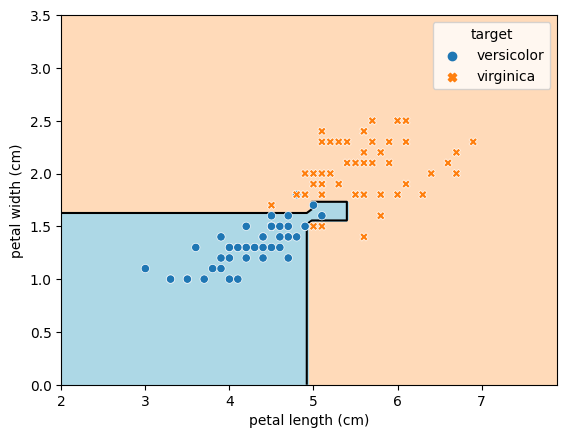

In [173]:
# plot the decision region of the decision tree
ax = plot_decision_boundary(
    decision_tree_2,
    X_non_separable,
    cmap=ListedColormap(["lightblue", "peachpuff"]),
)

# plot the decision boundary of the decision tree
plot_decision_boundary(
    decision_tree_2,
    X_non_separable,
    plot_method="contour",
    levels=[0],
    ax=ax,
    colors="black",
    zorder=1,
)

# overlay the dataset points
sns.scatterplot(
    data=non_separable_data,
    x=feature_1,
    y=feature_2,
    hue=y_non_separable,
    style=y_non_separable,
    ax=ax,
    zorder=2,
);

### Random Forest

### **Exercise**

Research what is a random forest.

Build a random forest classifier with scikit learn.

Plot its decision boundary and regions.

Go to this [website](http://cs.stanford.edu/people/karpathy/svmjs/demo/demoforest.html) and play with RF parameters.

## 3. Model evaluation [30 min]

You have seen multiple models for Iris flower classification.

Which model is the best fit?

How can we be confident about the predictions of a model, or evaluate its performance?

### Training and test split

We could use the training data to count the number of correct and erroneous predictions.

However this is a bad choice, as the Nearest Neighbor will always have 0 errors (can you see why?).

In general, some models are very flexible and can fit any dataset.

Others are rigid - like the linear SVM - and will not perfectly fit all datasets.

Using the training data will not provide a clear picture of prediction accuracy for new points.

**Solution**: Split the dataset into two parts: one for **training** another for evaluation or **testing**.

In [174]:
# import the train_test_split function from scikit-learn module for model selection
from sklearn.model_selection import train_test_split

In [175]:
# split dataset and labels into test and train
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris,
    y_iris,
    test_size=0.3,  # test dataset is 30% of all data
)

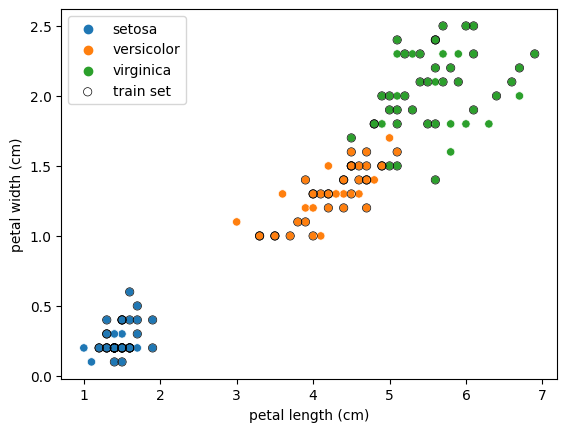

In [176]:
# draw the dataset
sns.scatterplot(data=iris_data, x=feature_1, y=feature_2, hue=y_iris)

# with circles around the training set
sns.scatterplot(
    data=X_iris_train,
    x=feature_1,
    y=feature_2,
    marker="o",
    edgecolor="black",
    facecolor="none",
    label="train set",
);

Splits are usually done randomly to avoid selection bias.

Often random sampling can introduce imbalances to both training and test dataset.

If a dataset contains 10 points of class A, and 100 points of class B, then random sampling is likely to bin all class A points into a single split.

In this case other sampling methods, such as stratified random sampling, are a better approach (such as `scikit-learn` [Stratified Shuffle Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn-model-selection-stratifiedshufflesplit)).

### Performance metrics

There are many measures of performance.

Accuracy, which is percentage of correct predictions, is commonly used for classification.

Other metrics will provide different information on the model's performace.

See the list of [classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) available in `scikit-learn`.

In [177]:
# create new Nearest Neighbor model
knn_model_3 = KNeighborsClassifier(n_neighbors=1)

# fit with train split
knn_model_3.fit(X_iris_train, y_iris_train)

# predict on the test data
iris_test_predictions = knn_model_3.predict(X_iris_test)

# compare to ground truth
is_correct = iris_test_predictions == y_iris_test

# print first results
is_correct.head()

67     True
84     True
143    True
32     True
76     True
Name: target, dtype: bool

In [178]:
# compute accuracy
n_correct_predictions = is_correct.sum()
accuracy = n_correct_predictions / len(X_iris_test)

print(f"Nearest Neighbor model accuracy = {accuracy:.1%}")

Nearest Neighbor model accuracy = 100.0%


In [179]:
# scikit-learn provides an easy way of evaluating models
score = knn_model_3.score(X_iris_test, y_iris_test)

print(f"Model score = {score:.1%}")

Model score = 100.0%


**Summary**

To evaluate a model:
1. Split dataset into train and test
2. Fit model with training data
3. Select relevant performance metrics
4. Evaluate with test data

This is done succinctly with `scikit-learn`

In [180]:
# split dataset and labels into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X_iris,
    y_iris,
    test_size=0.3,
)

# create model
model = KNeighborsClassifier(n_neighbors=1)

# fit model with training data
model.fit(X_train, y_train)

# evaluate model with test data
# scikit learn has preselected accuracy as the relevant metric
score = model.score(X_test, y_test)

print(f"Model score = {score:.1%}")

Model score = 95.6%


### **Exercise**

Compute the accuracy score of all previous classification models on the iris dataset.

Which one is better?

Does the answer change if you use a different dataset split?

Research what is cross-validation

Implement cross-validation with scikit-learn (optional)

## 4. Regression [30 min]

When the target of supervised learning is a numerical variable.

**Examples**

* Trying to predict future $CO_2$ levels for the next decade. Here the feature vector **x** = year and target variable **y** = $CO_2$ levels.

![historic atmospheric co2 data](https://research.noaa.gov/Portals/0/EasyGalleryImages/1/864/co2_data_mlo.png)

(taken from [NOAA research news](https://research.noaa.gov/article/ArtMID/587/ArticleID/2764/Coronavirus-response-barely-slows-rising-carbon-dioxide), Monday, June 7, 2021)

### Linear regression

Let use scikit-learn to generate synthetic data for a regression task

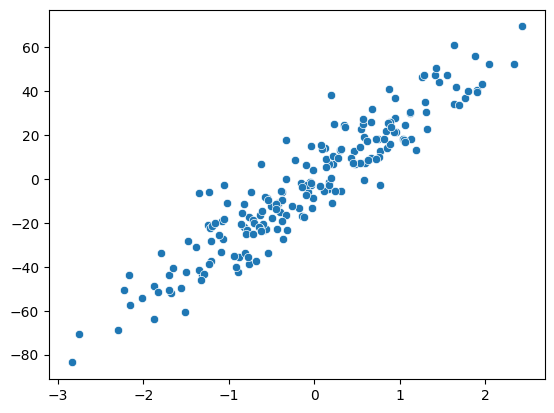

In [181]:
# import make_regression function from scikit-learn datasets module
from sklearn.datasets import make_regression

# generate a random dataset for regression with some noise and 200 points
X_reg, y_reg = make_regression(n_features=1, noise=10, n_samples=200)

# use seaborn to generate a scatterplot
sns.scatterplot(x=X_reg.flatten(), y=y_reg);

A linear regression model assumes that there is a **linear** relation between the features and the target variable

$$ {\bf y} = m {\bf x} + b $$

The parameters $m$ (slope) and $b$ (bias) that best "fit" the data points can be found algorithmically.

How good a model fits the data is determined by minimizing some **loss** or error.

In the case of the linear model, the loss is measured by the Mean Squared Error (MSE), but we won't delve into details here.

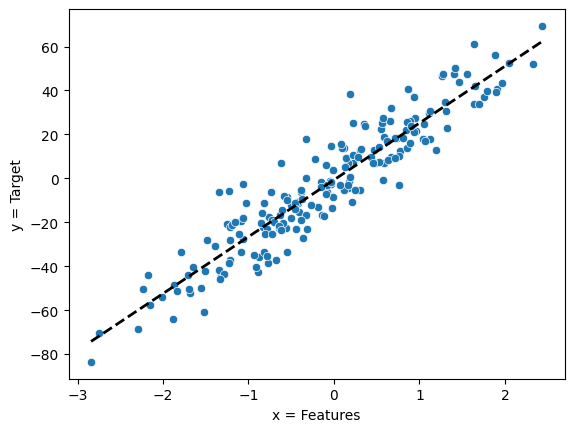

In [182]:
# import the Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# fit a linear model to the example data
linear_reg_1 = LinearRegression().fit(X_reg, y_reg)

# plot the datapoints. x = features, y = target value
ax = sns.scatterplot(x=X_reg.flatten(), y=y_reg)

x_min = X_reg.min()
x_max = X_reg.max()

# generate a prediction using the linear model on the example data
pred = linear_reg_1.predict([[x_min], [x_max]])

# plot the predicted line
ax.plot([x_min, x_max], pred, color="black", linestyle="--", linewidth=2)

# add labels to axis
ax.set_xlabel("x = Features")
ax.set_ylabel("y = Target");

Once fitted, a prediction for points outside the dataset is computed with the same formula.

$$ {\bf y_{pred}} = m {\bf x_{test}} + b $$

In [183]:
# define a new test point at x = 2
test_point = [2]

In [184]:
# use the linear model to predict its target value
predicted_value = linear_reg_1.predict([test_point])[0]

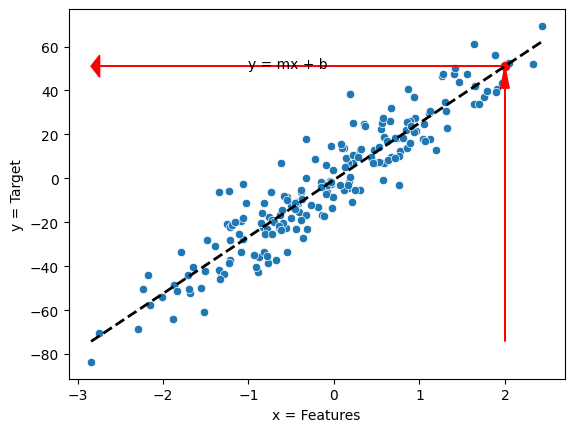

In [185]:
# plot the datapoints. x = features, y = target value
ax = sns.scatterplot(x=X_reg.flatten(), y=y_reg)

# plot the predicted line
ax.plot([x_min, x_max], pred, color="black", linestyle="--", linewidth=2)

# draw a point at the test point with its predicted value
plt.scatter(test_point, [predicted_value], color="red")

y_min = pred.min()

# draw a vertical arrow from the x-axis at x = test_point to its predicted value
ax.arrow(
    2,
    y_min,
    0,
    predicted_value - y_min,
    color="red",
    head_width=0.1,
    head_length=10,
    length_includes_head=True,
)

# draw a horizontal arrow from the point (x, y) = (test_point, predicted_value) to
# the y-axis at y = predicted_value
ax.arrow(
    test_point[0],
    predicted_value,
    -test_point[0] + x_min,
    0,
    color="red",
    head_width=10,
    head_length=0.1,
    length_includes_head=True,
)

# add the linear formula to the plot
ax.text(-1, 50, "y = mx + b")

# add labels to axis
ax.set_xlabel("x = Features")
ax.set_ylabel("y = Target");

### Nearest Neighbor Regression

In [186]:
# create another dataset
# here target_ideal is a nonlinear function of x
X_reg_2 = np.arange(0, 100, 2.0)
y_reg_2_ideal = np.sin(X_reg_2 / 10) + (X_reg_2 / 50) ** 2

# add some noise to our target variable target_ideal
y_reg_2 = y_reg_2_ideal + np.random.normal(size=len(y_reg_2_ideal)) * 0.3

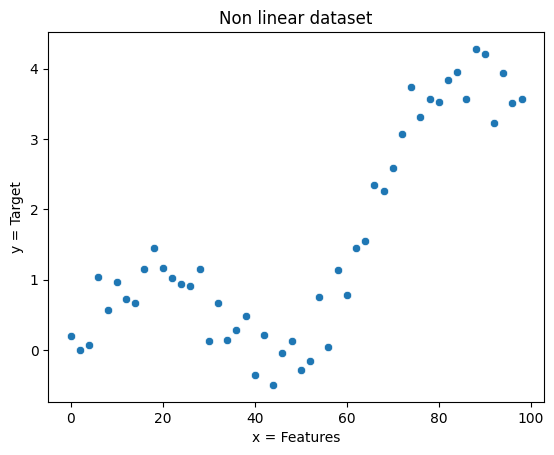

In [187]:
# plot scatter points (x = features, y = target)
ax = sns.scatterplot(x=X_reg_2, y=y_reg_2)

# add title
ax.set_title("Non linear dataset")

# add labels to axis
ax.set_xlabel("x = Features")
ax.set_ylabel("y = Target");

As with classification, linear models are very rigid and will produce bad predictions here.

In [188]:
# fit linear model
linear_reg_2 = LinearRegression()
linear_reg_2.fit(X_reg_2.reshape(-1, 1), y_reg_2);

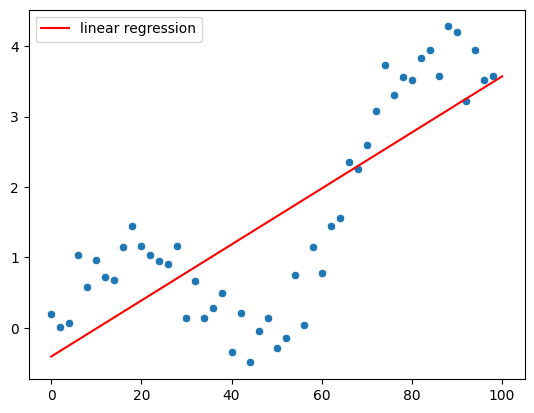

In [189]:
# predict on a range of test points
test_points = np.linspace(0, 100, 1000)
linear_reg_pred_2 = linear_reg_2.predict(test_points.reshape(-1, 1))

# plot dataset
sns.scatterplot(x=X_reg_2, y=y_reg_2)

# plot the fitted linear model
sns.lineplot(x=test_points, y=linear_reg_pred_2, color="red", label="linear regression");

How else can we predict target value of a test point using features?

**Simple idea revisited**: Use the nearest neighbor's target value as a prediction.

In [190]:
# import Nearest Neighbor Regression model from scikit-learn
from sklearn.neighbors import KNeighborsRegressor

In [191]:
# fit nearest neighbor model
knn_reg = KNeighborsRegressor(n_neighbors=1)
knn_reg.fit(X_reg_2.reshape(-1, 1), y_reg_2);

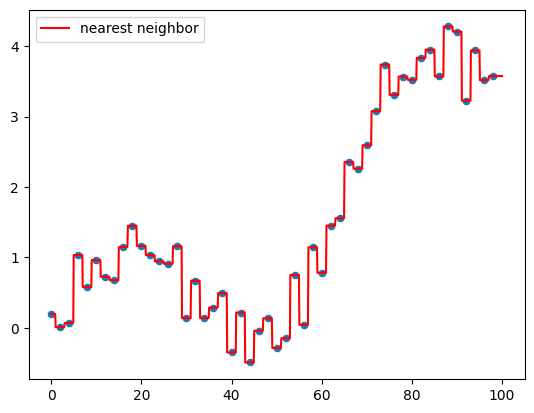

In [192]:
# predict on a range of test points
test_points = np.linspace(0, 100, 1000)
knn_reg_pred_2 = knn_reg.predict(test_points.reshape(-1, 1))

# plot dataset
sns.scatterplot(x=X_reg_2, y=y_reg_2)

# plot fitted nearest neighbor model
sns.lineplot(x=test_points, y=knn_reg_pred_2, color="red", label="nearest neighbor");

Nearest neighbor regression suffers from the same problems as nearest neighbor classification:
    
* Sensitive to noise
* Heavy on computation and memory

### Random Forest Regression

Similarly the Random Forest model can be adapted for regression tasks

In [193]:
# import Nearest Neighbor Regression model from scikit-learn
from sklearn.ensemble import RandomForestRegressor

In [194]:
# fit random forest regression model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_reg_2.reshape(-1, 1), y_reg_2);

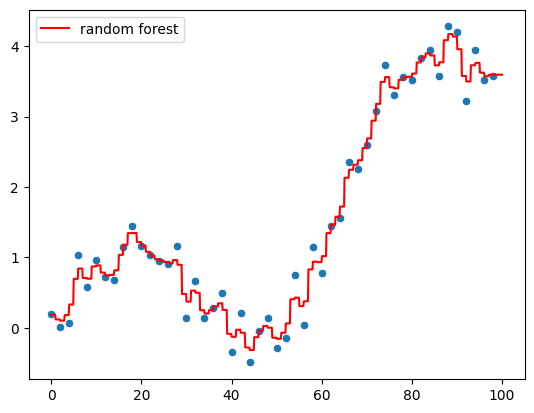

In [195]:
# predict on a range of test points
test_points = np.linspace(0, 100, 1000)
rf_reg_pred_2 = rf_reg.predict(test_points.reshape(-1, 1))

# plot the fitted linear model and random forest
sns.scatterplot(x=X_reg_2, y=y_reg_2)

sns.lineplot(x=test_points, y=rf_reg_pred_2, color="red", label="random forest");

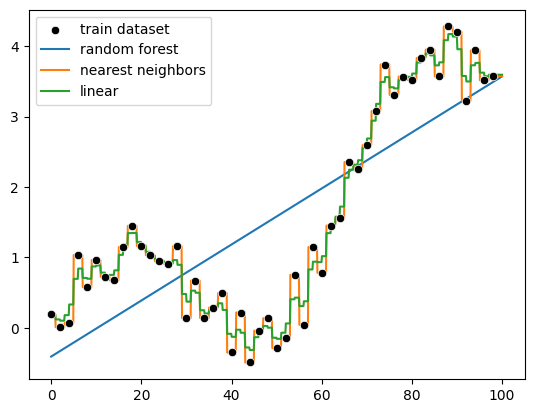

In [196]:
# plot training dataset
sns.scatterplot(x=X_reg_2, y=y_reg_2, color="black", label="train dataset", zorder=4)

# plot the all fitted models
sns.lineplot(x=test_points, y=linear_reg_pred_2, label="random forest")
sns.lineplot(x=test_points, y=knn_reg_pred_2, label="nearest neighbors")
sns.lineplot(x=test_points, y=rf_reg_pred_2, label="linear");

**Which is the best predictive model?**

**How to evaluate regression models?**

Similar procedure as classification but different metric.

How to measure good fit?

One option is to use **Mean Squared Error (MSE)**:

$$ MSE = \frac{1}{n} \sum_{i = 1}^{n} (y_{true} - y_{pred})^2 $$

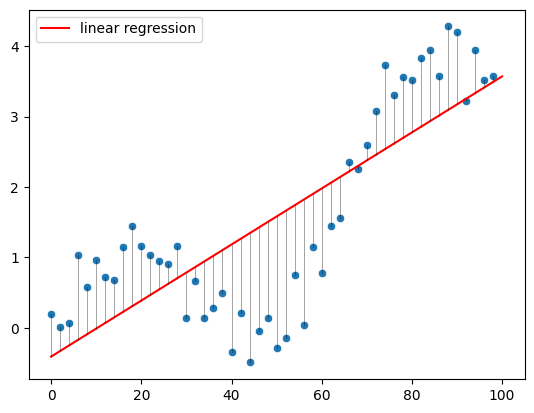

In [197]:
# plot training dataset
ax = sns.scatterplot(x=X_reg_2, y=y_reg_2)

# plot fitted line
sns.lineplot(x=test_points, y=linear_reg_pred_2, color="red", label="linear regression")

# use linear model to predict on original dataset
y_reg_2_linear_pred = linear_reg_2.predict(X_reg_2.reshape(-1, 1))

# plot errors
for x, y_true, y_pred in zip(X_reg_2, y_reg_2, y_reg_2_linear_pred):
    ax.plot([x, x], [y_true, y_pred], alpha=0.5, color="black", linewidth=0.5);

In [198]:
# compute the array of differences in prediction and true value
error = y_reg_2 - y_reg_2_linear_pred

# compute the square of each error
squared_error = error ** 2

# compute the mean
MSE = squared_error.mean()

print(f"MSE of linear model on training dataset: {MSE}")

MSE of linear model on training dataset: 0.8604982503794671


Scikit-learn implements MSE and offers multiple regression metrics.

Each metric has its benefits and pitfalls. Choice depends on use case.

Visit this [site](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) to see available regression metrics.

In [199]:
# scikit-learn provides tools for easy computation of MSE
from sklearn.metrics import mean_squared_error

# use scikit-learn function to compute MSE
MSE = mean_squared_error(y_true=y_reg_2, y_pred=y_reg_2_linear_pred)

print(f"Score of linear model: {MSE}")

Score of linear model: 0.8604982503794671


Split the dataset into train and test to make a fair comparison between different models

In [200]:
# split features and target into train and test. Test is 30% of all data.
X_reg_2_train, X_reg_2_test, y_reg_2_train, y_reg_2_test = train_test_split(
    X_reg_2, y_reg_2, test_size=0.3
)

# iterate over model types
for model in [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=1),
    RandomForestRegressor(),
]:
    # fit the model to training data
    model.fit(X_reg_2_train.reshape(-1, 1), y_reg_2_train)

    # use fitted model to predict in test data
    y_pred = model.predict(X_reg_2_test.reshape(-1, 1))

    # compute MSE using the predictions and ground truth
    mse = mean_squared_error(y_true=y_reg_2_test, y_pred=y_pred)

    print(f"{str(model):>34} mse = {mse}")

                LinearRegression() mse = 0.9741747683624704
KNeighborsRegressor(n_neighbors=1) mse = 0.2940284218356616
           RandomForestRegressor() mse = 0.1939663940133852


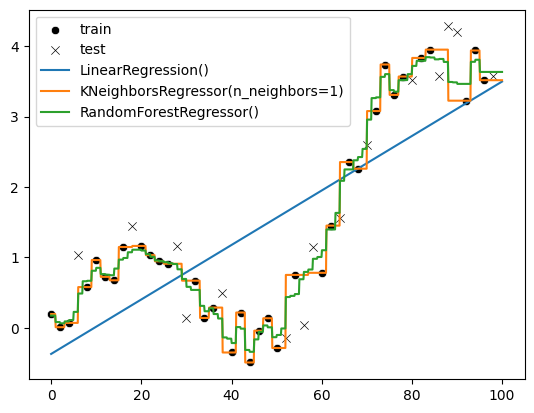

In [201]:
# plot train and test points
sns.scatterplot(
    x=X_reg_2_train,
    y=y_reg_2_train,
    color="black",
    marker="o",
    label="train",
)

sns.scatterplot(
    x=X_reg_2_test,
    y=y_reg_2_test,
    color="black",
    marker="x",
    label="test",
)

# iterate over model types
for model in [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=1),
    RandomForestRegressor(),
]:
    # fit the model to training data
    model.fit(X_reg_2_train.reshape(-1, 1), y_reg_2_train)

    # generate predictions in range of data points
    test_points = np.linspace(0, 100, 1000)
    y_pred = model.predict(test_points.reshape(-1, 1))

    # plot predicted line
    sns.lineplot(x=test_points, y=y_pred, label=str(model))

**What if number of features > 1?**

In most cases multiple features are used for prediction.

That is the same as saying feature vectors are multidimensional.

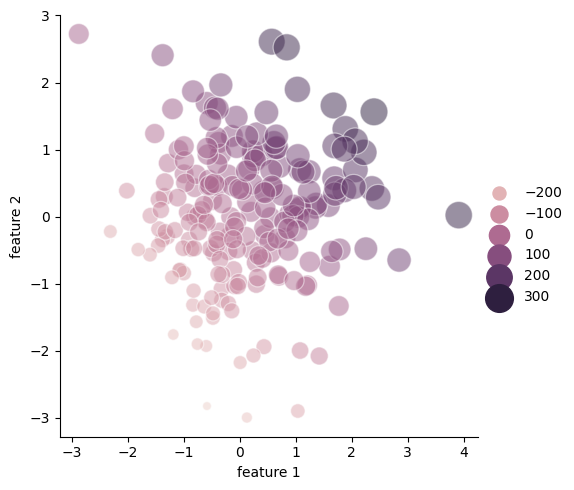

In [202]:
# generate a synthetic dataset for regression with 2 features
X_2D, y_2D = make_regression(
    n_samples=200,
    n_features=2,
    n_targets=1,
)

# visualise with seaborn
# plot points at (x = feature 1, y = feature 2)
# use the target variable to determine point size and colour
grid = sns.relplot(
    x=X_2D[:, 0],
    y=X_2D[:, 1],
    size=y_2D,
    sizes=(40, 400),
    alpha=0.5,
    hue=y_2D,
)

# add axis labels
grid.ax.set_xlabel("feature 1")
grid.ax.set_ylabel("feature 2");

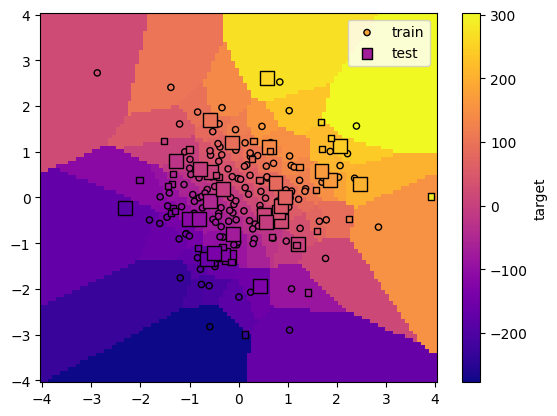

In [203]:
# split dataset into train and test
X_2D_train, X_2D_test, y_2D_train, y_2D_test = train_test_split(
    X_2D,
    y_2D,
    test_size=0.3,
)

# fit a Nearest Neighbor Regression model to training data
knn_reg_2D = KNeighborsRegressor(n_neighbors=1).fit(X_2D_train, y_2D_train)

# create a mesh of points
XX, YY = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))

# predict on each point in mesh
knn_2D_predictions = knn_reg_2D.predict(np.c_[XX.flatten(), YY.flatten()])

# compute the min and max value of predictions
vmin, vmax = knn_2D_predictions.min(), knn_2D_predictions.max()

# select colormap
# see available colormaps at https://matplotlib.org/stable/tutorials/colors/colormaps.html
cmap = "plasma"

# plot
ax = plt.pcolormesh(
    XX,
    YY,
    knn_2D_predictions.reshape(XX.shape),
    vmin=vmin,
    vmax=vmax,
    cmap=cmap,
)

# create a color bar to indicate mapping between columns and target values
cbar = plt.colorbar()

# add label to color bar
cbar.set_label("target")

# plot training data as small round points
plt.scatter(
    X_2D_train[:, 0],
    X_2D_train[:, 1],
    c=y_2D_train,
    s=20,
    edgecolor="black",
    label="train",
    vmin=vmin,
    vmax=vmax,
    cmap=cmap,
)

# compute predictions at test points
y_2D_test_pred = knn_reg_2D.predict(X_2D_test)

# compute prediction absolute error
error = np.abs(y_2D_test - y_2D_test_pred)

# plot test data as large square markers
# color squares using true value of target variable
# use absolute error to determine square size
plt.scatter(
    X_2D_test[:, 0],
    X_2D_test[:, 1],
    s=error,
    c=y_2D_test,
    marker="s",
    edgecolor="black",
    label="test",
    vmin=vmin,
    vmax=vmax,
    cmap=cmap,
    sizes=(20, 100),
)

# add legend to figure
plt.legend();

### **Exercise**

Checkout the [diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

Load the features and target variables from `scikit-learn`.

Split the data into training and test sets.

Select any regression model(s) of your choice and fit to train data.

Evaluate model fit with test data and MSE (and other metrics of your choice).

## 5. Dimensionality Reduction [20 min]

Often the data we collect can be very **high dimensional**. e.g. D > 1000

This poses a problem as it is difficult to visualize anything greater than 3 dimensions.

We can **project** this data down to a lower dimension. P << D, where P is typically 2 or 3

### PCA

One of the simplest approach is to do a linear projection.

**PCA** is a linear projection that aligns with the directions of highest variance.

In [204]:
# the full iris dataset has 4 features
iris_data.shape

(150, 4)

In [205]:
# import PCA from scikit-learn
from sklearn.decomposition import PCA

In [206]:
# create a 2-dimensional PCA projection
pca_model = PCA(n_components=2)

In [207]:
# project the 4-dimensional iris dataset into 2-d points
projected_iris = pca_model.fit_transform(iris_data)

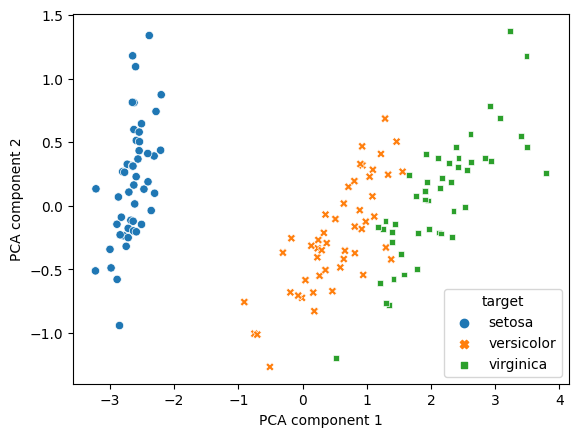

In [208]:
# plot projected points
# use species to color points
ax = sns.scatterplot(
    x=projected_iris[:, 0],
    y=projected_iris[:, 1],
    hue=y_iris,
    style=y_iris,
)

# add labels to axis
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2");

### Visualization

As a final example let explore a dataset of digits.

Each data point is an grayscale image of a handwritten digit.

The images are 8x8 pixels, so in total each point has 64 features.

In this case a feature is the grayscale value of a single pixel.

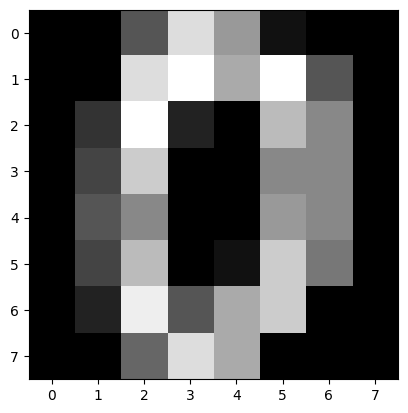

In [209]:
# import load_digits function from scikit-learn datasets module
from sklearn.datasets import load_digits

# load digits dataset
digits = load_digits()

# extract data and target values
X_digits = digits.data
y_digits = digits.target

# select a single data point
# reshape to original 8x8 array
digit = X_digits[0].reshape(8, 8)

# use matplotlib to show image
plt.imshow(digit, cmap="gray");

**How to visualize the whole dataset?**

Use dimensionality reduction

Lets try PCA

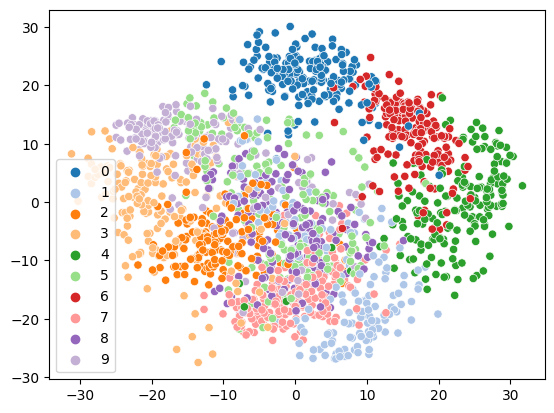

In [210]:
# use PCA to project to 2 dimensions
pca_digits = PCA(n_components=2).fit_transform(X_digits)

# do a scatterplot, color points by digit
sns.scatterplot(
    x=pca_digits[:, 0],
    y=pca_digits[:, 1],
    hue=y_digits,
    palette="tab20",
);

Some digits seem to cluster.

Still, there is a lot of overlap.

Lets try a different projection method.

Now we will use a non-linear projection called **t-SNE**.

Checkout the [paper](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) where t-SNE was introduced, or this amazing [blog](https://distill.pub/2016/misread-tsne/) for further information.

In [211]:
# import t-SNE mapping from scikit-learn
from sklearn.manifold import TSNE

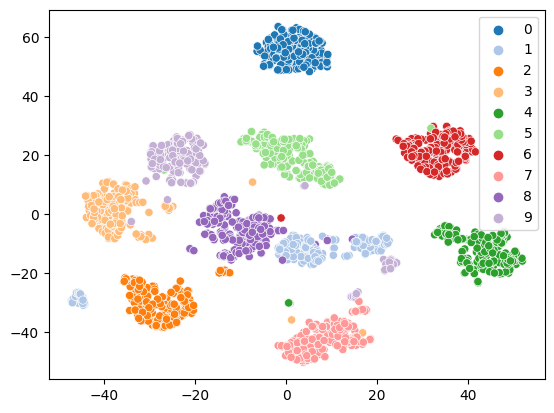

In [212]:
# use TSNE to project to 2 dimensions
tsne_digits = TSNE(
    n_components=2,
    init="pca",
    learning_rate="auto",
).fit_transform(X_digits)

# do a scatterplot, color points by digit
sns.scatterplot(
    x=tsne_digits[:, 0],
    y=tsne_digits[:, 1],
    hue=y_digits,
    palette="tab20",
);

### **Exercise**

Checkout the [wine dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset).

Load the wine dataset with scikit-learn.

Use PCA and t-SNE projections on the data.

Do a scatterplot with the results and use the target wine class to colour points.

Are points from different wine classes separated?

Install the [umap-learn](https://umap-learn.readthedocs.io/en/latest/index.html) library and test the UMAP (Uniform Manifold Approximation and Projection) algorithm. (optional)

## 6. Clustering [20 min]

**What if we don't have any labels?**

Often our data contains some **structure**.

* Features from different classes might be separated (**separability**)

* Similar objects might have similar features (**smoothness**)

Often we wish to find groupings or patterns in our data. This is called **clustering**.

Datapoints in the same **cluster** are deemed to be similar under some measure.

### K-Means Clustering

There are many algorithms for clustering. Here you will use k-means clustering.

Scikit-learn has a [collection of clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html#clustering), including k-means.

If interested, checkout an [explanation](https://www.youtube.com/watch?v=4b5d3muPQmA) of the k-means clustering algorithm or an [interactive simulation](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/).

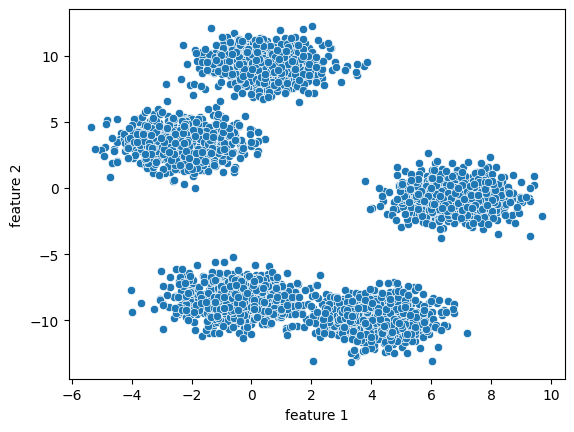

In [213]:
# import make_blobs function in scikit-learn datasets module
from sklearn.datasets import make_blobs

# generate synthetic dataset made up of 5 blobs
X_blobs, y_blobs = make_blobs(n_features=2, n_samples=4000, centers=5)

# plot synthetic dataset
ax = sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1])

ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2");

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


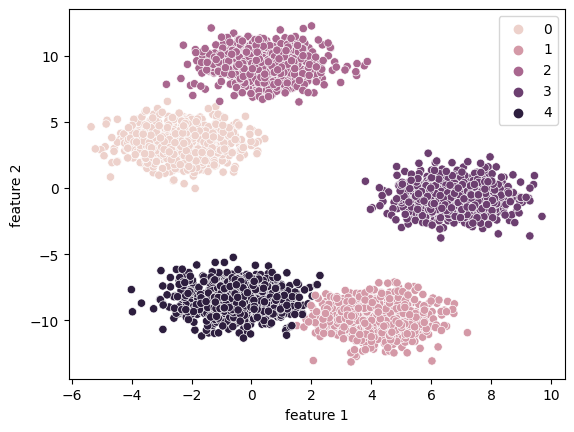

In [214]:
# import k-means clustering model from scikit-learn
from sklearn.cluster import KMeans

# create a new K-means clustering model.
# specify 5 wanted clusters
kmeans_model_1 = KMeans(n_clusters=5)

# fit to dataset
kmeans_model_1.fit(X_blobs)

# get predicted clusters for the dataset
y_blobs_pred = kmeans_model_1.predict(X_blobs)

# plot predictions
ax = sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1], hue=y_blobs_pred)

ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2");

Clustering performance will depend on clustering parameters, choice of algorithm and data structure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


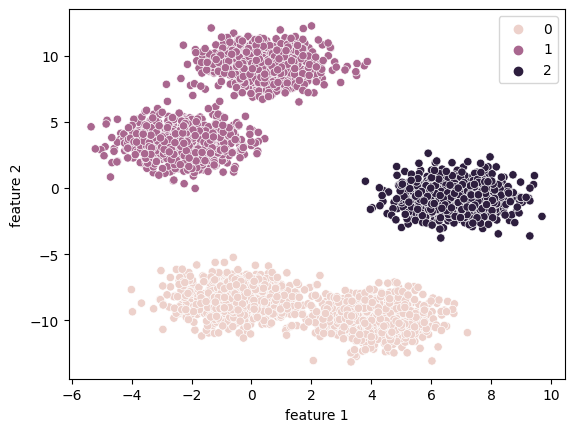

In [215]:
# repeat with 3 clusters
kmeans_model_2 = KMeans(n_clusters=3)

# fit to dataset
kmeans_model_2.fit(X_blobs)

# get predicted clusters for the dataset
y_blobs_pred = kmeans_model_2.predict(X_blobs)

# plot predictions
ax = sns.scatterplot(x=X_blobs[:, 0], y=X_blobs[:, 1], hue=y_blobs_pred)
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2");

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


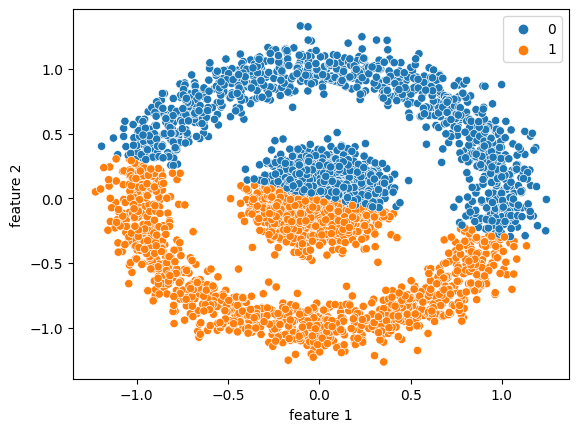

In [216]:
from sklearn.datasets import make_circles

# repeat with other dataset
X_circles, y_circles = make_circles(factor=0.2, n_samples=4000, noise=0.1)

# create K means with 2 clusters
kmeans_model_3 = KMeans(n_clusters=2)

# fit to dataset
kmeans_model_3.fit(X_circles)

# get predicted clusters for the dataset
y_pred = kmeans_model_3.predict(X_circles)

# plot predictions
ax = sns.scatterplot(x=X_circles[:, 0], y=X_circles[:, 1], hue=y_pred)
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2");

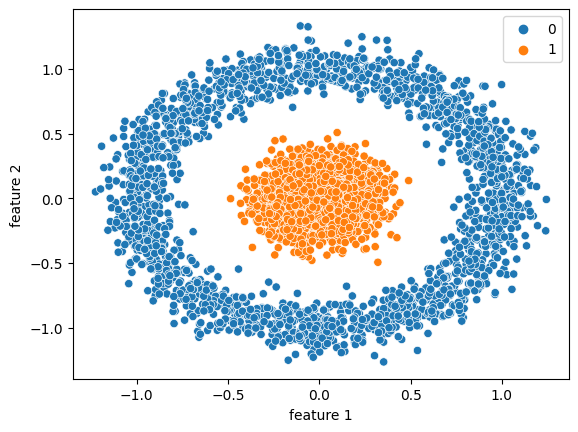

In [217]:
# repeat with DBscan algorithm
from sklearn.cluster import DBSCAN

# create DBSCAN model
dbscan_model = DBSCAN(eps=0.15)

# fit to dataset
y_pred = dbscan_model.fit_predict(X_circles)

# plot predictions
ax = sns.scatterplot(x=X_circles[:, 0], y=X_circles[:, 1], hue=y_pred)
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2");

### **Exercise**

Use K-means clustering on the iris dataset

Can you recover the species separation?

Research Affinity Propagation clustering and compare to K-Means clustering

## Summary

**Which algorithm to choose?**

Short answer: It depends!

> The “No Free Lunch” Theorem argues that, without having substantive information about the modeling problem, there is no single model that will always do better than any other model. Because of this, a strong case can be made to try a wide variety of techniques, then determine which model to focus on.
>
> — Pages 25-26, Applied Predictive Modeling, 2013.

No silver bullet, but often for classification it is sensible to first try a Support Vector Machine or Random Forest.

This will give you an idea of how separable your data is. The next step is to try different features, and perhaps even collect more training data.

**How much data do I need?**

Short answer: It depends!

It depends on how easy it is for your classifier to separate your data.

Some problems are relatively easy and don’t require lots of data, others such as species identification in images can require 10,000s.